<p style="color: green; font-size: 40px; font-weight: bold;">
    Data Analysis and Data Visualization
</p>

![Sample Image](image.jpg)

#### Import Necessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Read and analyze the data

In [3]:
df = pd.read_excel("data.xlsx")

In [4]:
# Head of the data
df.head()

,fuel consumption (senario 1),cycle number,distance (senario 1),mean slope in a day distance (senario1),total weight in total cycle (ton),mean v max,produc…
0,190,0,220,0.5,0,0.00,0
1,107,0,175,0.3,0,0.00,0
2,1264,11,105053,5.0,3800,21.00,1496
3,1269,12,105762,5.5,4100,24.35,1632
4,1330,14,135000,5.4,4800,25.98,1904


In [5]:
# Tail of the data
df.tail()

,fuel consumption (senario 1),cycle number,distance (senario 1),mean slope in a day distance (senario1),total weight in total cycle (ton),mean v max,produc…
24,1213,16,117300,5.5,5376,23.15,2350
25,1060,15,132987,4.0,5040,24.18,1532
26,1392,26,183593,6.4,8736,26.00,1900
27,1300,28,150335,5.2,9408,26.32,1856
28,1400,19,175143,8.0,6384,28.00,2584


In [6]:
# Shape of the data
df.shape

(29, 7)

In [7]:
# Columns of the data
list(df.columns)

['fuel consumption (senario 1)',
 'cycle number',
 'distance (senario 1)',
 'mean slope in a day distance (senario1)',
 'total weight in total cycle (ton)',
 'mean v max ',
 'produc…']

In [8]:
# Information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   fuel consumption (senario 1)             29 non-null     int64  
 1   cycle number                             29 non-null     int64  
 2   distance (senario 1)                     29 non-null     int64  
 3   mean slope in a day distance (senario1)  29 non-null     float64
 4   total weight in total cycle (ton)        29 non-null     int64  
 5   mean v max                               29 non-null     float64
 6   produc…                                  29 non-null     int64  
dtypes: float64(2), int64(5)
memory usage: 1.7 KB


In [9]:
# Description of the data
df.describe()

,fuel consumption (senario 1),cycle number,distance (senario 1),mean slope in a day distance (senario1),total weight in total cycle (ton),mean v max,produc…
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,1252.931034,17.689655,141688.551724,5.617241,5955.517241,24.401379,2270.551724
std,401.838359,7.869940,61287.233592,2.096267,2627.864840,7.499729,1025.392593
min,107.000000,0.000000,175.000000,0.300000,0.000000,0.000000,0.000000
25%,1203.000000,14.000000,110772.000000,5.000000,4704.000000,23.000000,1632.000000
50%,1300.000000,16.000000,135097.000000,5.500000,5500.000000,25.980000,2176.000000
75%,1445.000000,25.000000,183593.000000,7.300000,8400.000000,28.250000,3264.000000
max,2125.000000,29.000000,243200.000000,8.500000,9744.000000,32.000000,3944.000000


In [10]:
# NULL value of the data
df.isnull().sum()

fuel consumption (senario 1)               0
cycle number                               0
distance (senario 1)                       0
mean slope in a day distance (senario1)    0
total weight in total cycle (ton)          0
mean v max                                 0
produc…                                    0
dtype: int64

#### Visualize the data

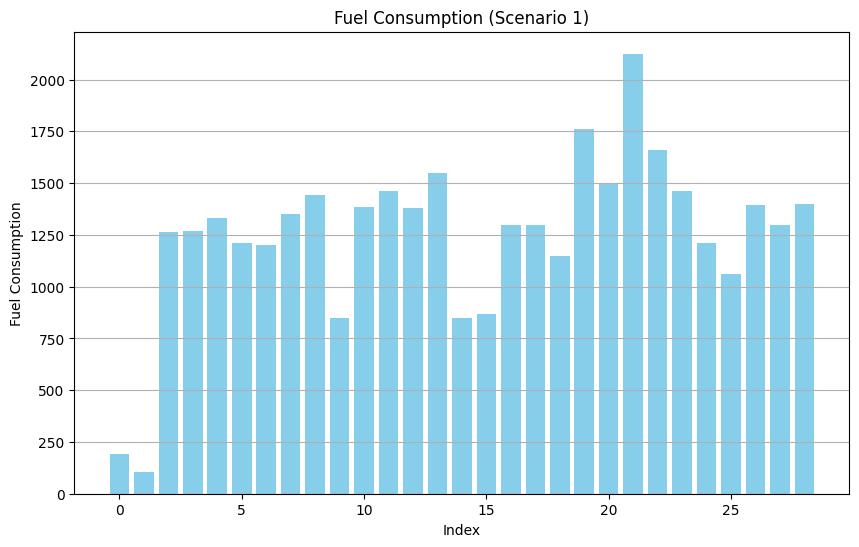

In [11]:
# Function to plot a bar chart for fuel consumption
def plot_fuel_consumption_barchart():
    plt.figure(figsize=(10, 6))
    plt.bar(df.index, df['fuel consumption (senario 1)'], color='skyblue')
    plt.title('Fuel Consumption (Scenario 1)')
    plt.xlabel('Index')
    plt.ylabel('Fuel Consumption')
    plt.grid(True, axis='y')
    plt.show()

# Plot the fuel consumption bar chart
plot_fuel_consumption_barchart()

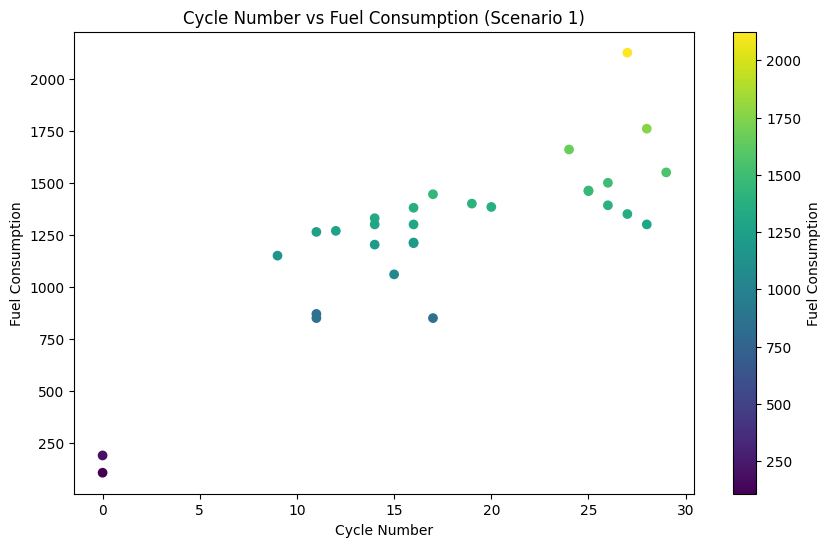

In [12]:
# Function to plot the relationship between cycle number and fuel consumption
def plot_cycle_number_vs_fuel_consumption():
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(df['cycle number'], df['fuel consumption (senario 1)'], c=df['fuel consumption (senario 1)'], cmap='viridis', marker='o')
    plt.title('Cycle Number vs Fuel Consumption (Scenario 1)')
    plt.xlabel('Cycle Number')
    plt.ylabel('Fuel Consumption')
    plt.colorbar(scatter, label='Fuel Consumption')
    plt.show()

# Plot the cycle number vs fuel consumption scatter plot
plot_cycle_number_vs_fuel_consumption()

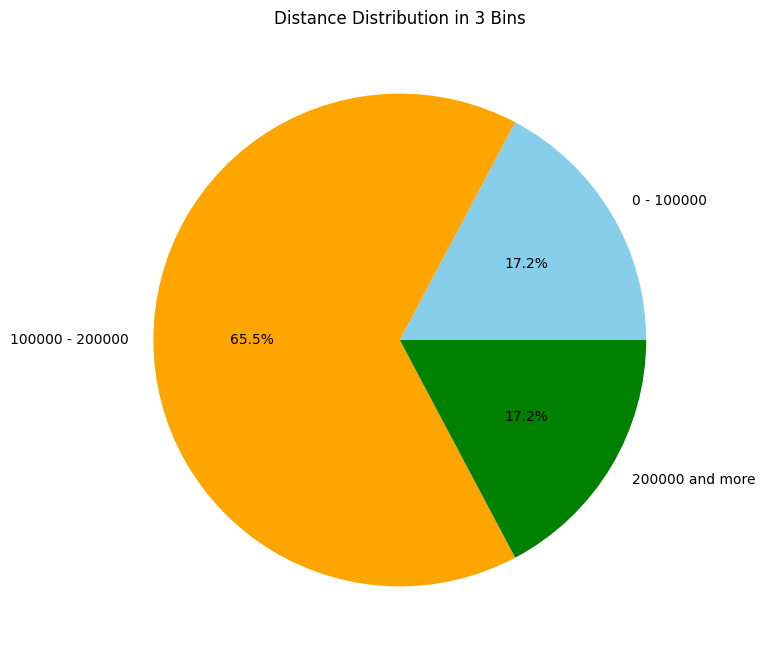

In [13]:
# Define bins and labels for the pie chart
bins = [0, 100000, 200000, float('inf')]
labels = ['0 - 100000', '100000 - 200000', '200000 and more']

# Bin the distance data
df['distance_bins'] = pd.cut(df['distance (senario 1)'], bins=bins, labels=labels)

# Calculate the counts for each bin
distance_counts = df['distance_bins'].value_counts().sort_index()

# Function to plot the pie chart for distance bins
def plot_distance_pie_chart():
    plt.figure(figsize=(8, 8))
    plt.pie(distance_counts, labels=distance_counts.index, autopct='%1.1f%%', colors=['skyblue', 'orange', 'green'])
    plt.title('Distance Distribution in 3 Bins')
    plt.show()

# Plot the distance pie chart
plot_distance_pie_chart()

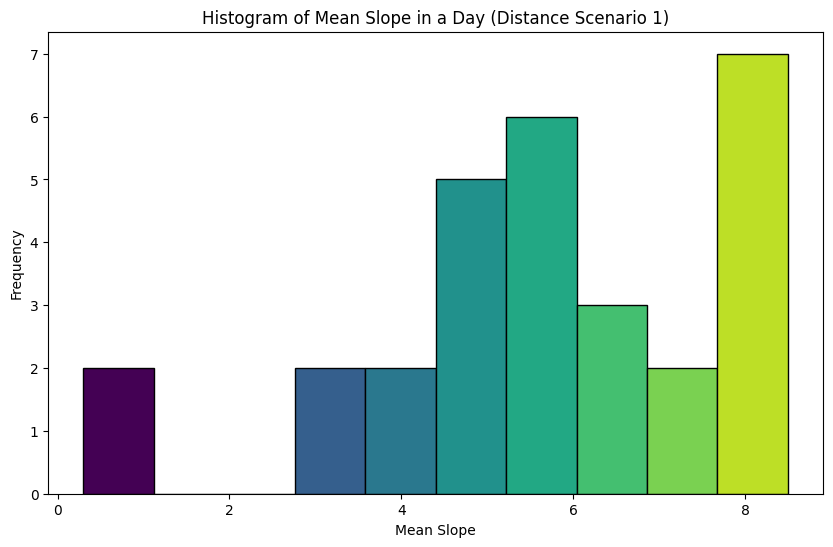

In [14]:
# Function to plot the histogram of the mean slope with each bar in different color
def plot_mean_slope_histogram_colored():
    plt.figure(figsize=(10, 6))
    n, bins, patches = plt.hist(df['mean slope in a day distance (senario1)'], bins=10, edgecolor='black')
    
    # Normalize the bins to interval [0,1]
    bin_norm = (bins - min(bins)) / (max(bins) - min(bins))
    
    # Define a colormap
    cmap = plt.colormaps.get_cmap('viridis')
    
    for bin, patch in zip(bin_norm, patches):
        color = cmap(bin)
        patch.set_facecolor(color)
    
    plt.title('Histogram of Mean Slope in a Day (Distance Scenario 1)')
    plt.xlabel('Mean Slope')
    plt.ylabel('Frequency')
    plt.show()

# Plot the histogram of the mean slope with each bar in different color
plot_mean_slope_histogram_colored()

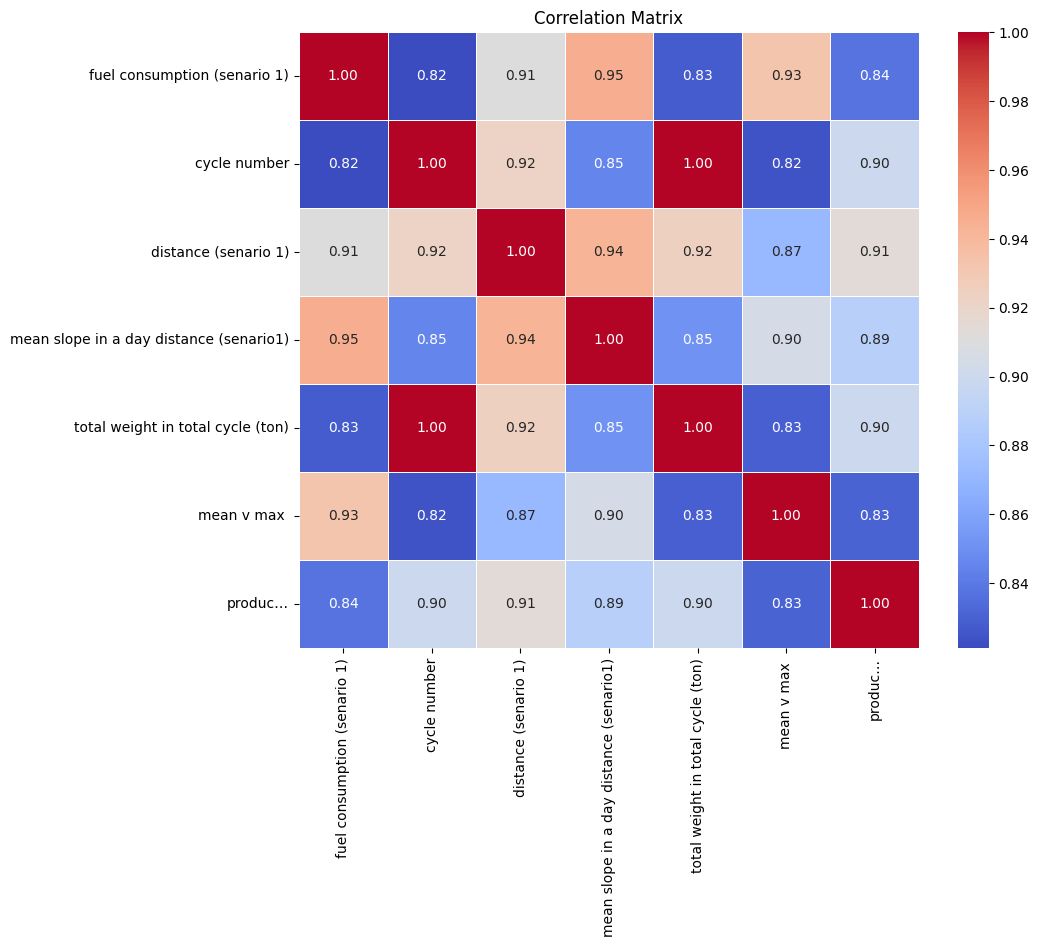

In [20]:
df = df.drop('distance_bins', axis=1)
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()